In [39]:
import os
import numpy as np
from numpy import random
import cv2 as cv
from matplotlib import pyplot as plt

In [61]:
img = cv.imread('lena.png')
im = cv.imread('lena.png', 0)

### 1. Compute and show bit planes of a random patch (position and sizes) of I if t is even;
### otherwise show in half image the red channel and in the remaining part the blue channel 

In [62]:
def binarization(im: np.ndarray) -> np.ndarray:
    
    height, width = im.shape
    binary = []    
    for i in range(height):
        for j in range(width):
            binary.append(np.binary_repr(im[i, j], width=8))
    binaryim = np.reshape(binary, (width, height))
    return binaryim


In [70]:
def bitplane(im):
    im = binarization(im)
    height, width = im.shape
        
    b1 = []
    b2 = []
    b3 = []
    b4 = []
    b5 = []
    b6 = []
    b7 = []
    b8 = []    
    for i in range(height):
        for j in range(width):
            #bin_repr = np.binary_repr(im[i, j], width=8)
            bit_list=list(im[i,j])
            for h in range(8):
                bit = int(bit_list[h])
                if h == 0:
                    b1.append(bit)
                elif h == 1:
                    b2.append(bit)
                elif h == 2:
                    b3.append(bit)
                elif h == 3:
                    b4.append(bit)
                elif h == 4:
                    b5.append(bit)
                elif h == 5:
                    b6.append(bit)
                elif h == 6:
                    b7.append(bit)
                else:
                    b8.append(bit)
            


    b1 = np.reshape(b1, (width,height))
    b2 = np.reshape(b2, (width,height))
    b3 = np.reshape(b3, (width,height))
    b4 = np.reshape(b4, (width,height))
    b5 = np.reshape(b5, (width,height))
    b6 = np.reshape(b6, (width,height))
    b7 = np.reshape(b7, (width,height))
    b8 = np.reshape(b8, (width,height))

    return b1, b2, b3, b4, b5, b6, b7, b8

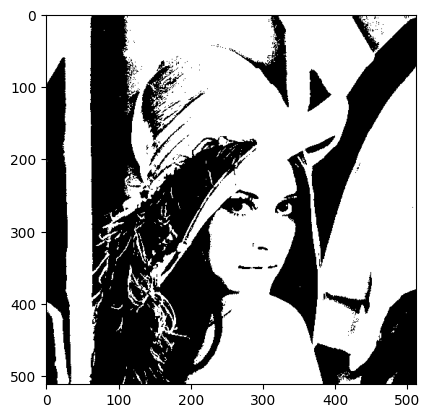

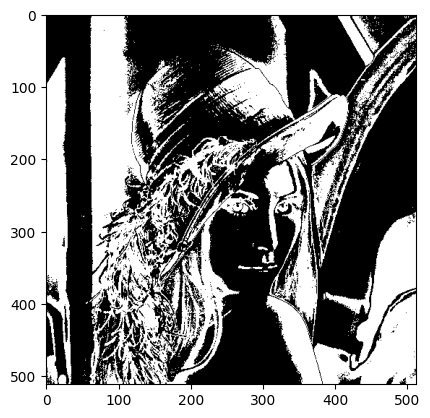

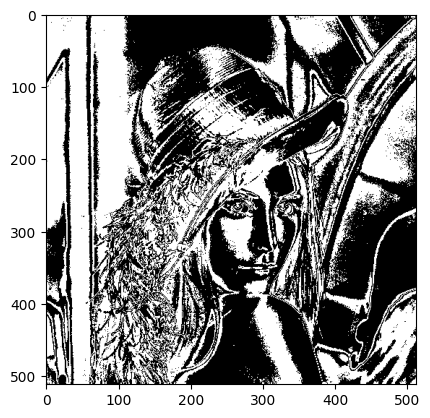

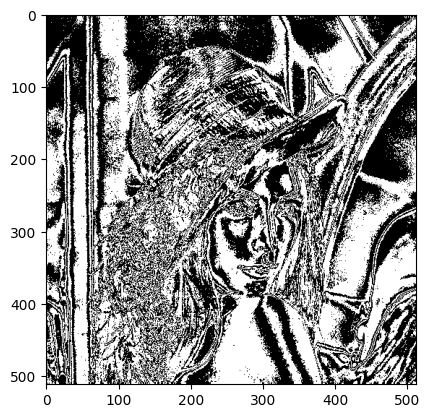

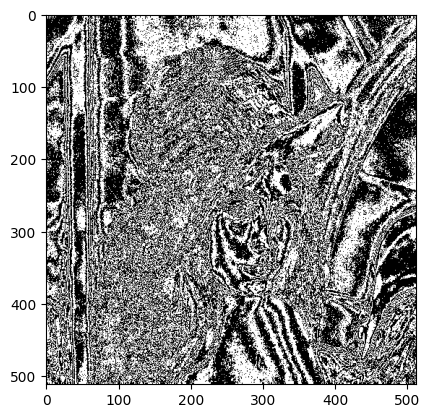

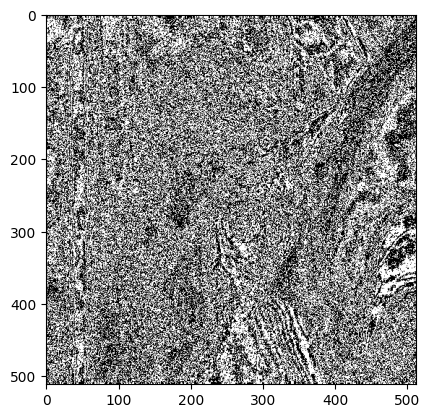

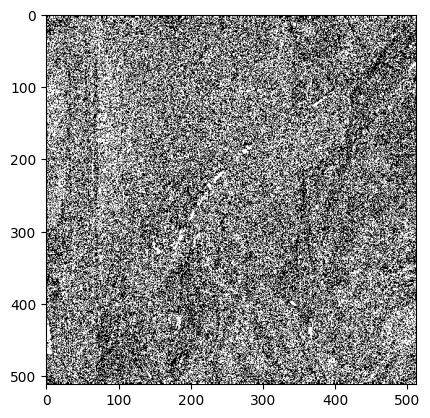

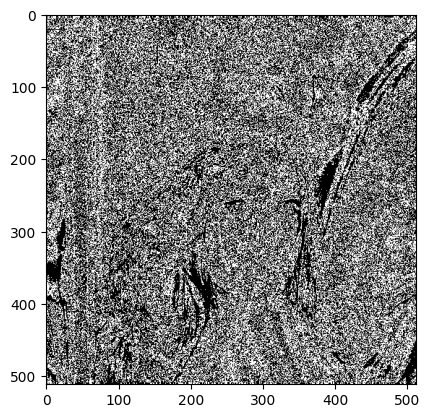

In [76]:
test = bitplane(im)
for i in test:
    plt.imshow(i, cmap='gray')
    plt.show()


In [74]:
def Random(im, t):
    if t % 2 == 0:
        im1 = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
        img_data = np.asarray(im1)
        h0 = random.randint(0, img_data.shape[0]//2)
        h1 = random.randint(img_data.shape[0]//2, img_data.shape[0])
        w0 = random.randint(0, img_data.shape[0]//2)
        w1 = random.randint(img_data.shape[0]//2, img_data.shape[0])
        img_data1 = bitplane(img_data[h0:h1,w0:w1])
        for i in img_data1:
            plt.imshow(i, cmap='gray')
            plt.show()
        return img_data1
    
    else: 
        b,g,r = cv.split(im)
        h = im.shape[1]
        w = im.shape[0]
        new = np.zeros((w,h))
        new[:,:h//2] = r[:,:h//2]
        new[:,h//2:] = b[:,h//2:]
        plt.imshow(new, cmap='gray')
        return new
        

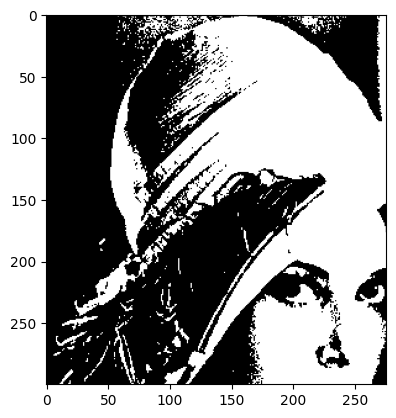

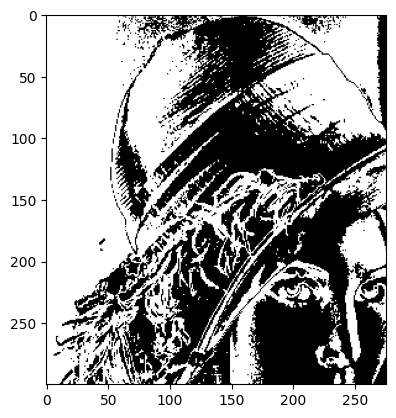

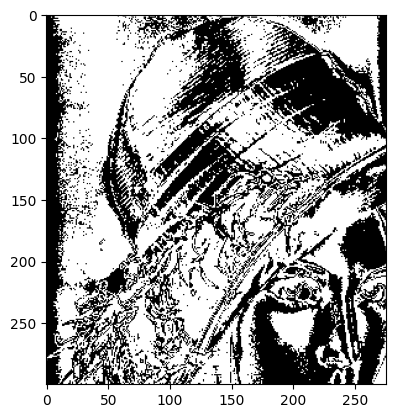

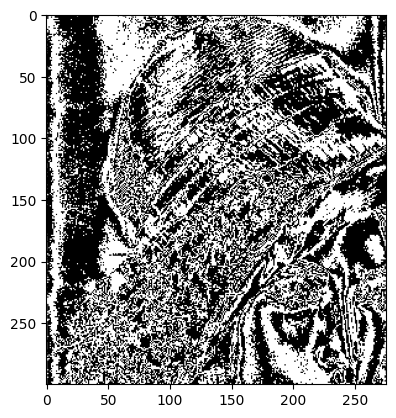

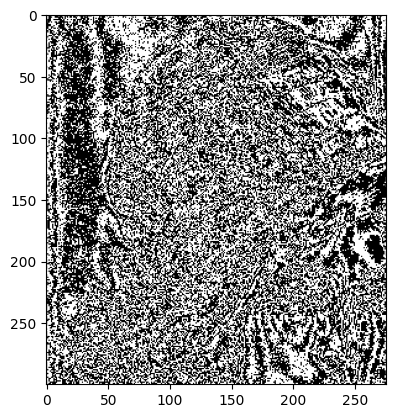

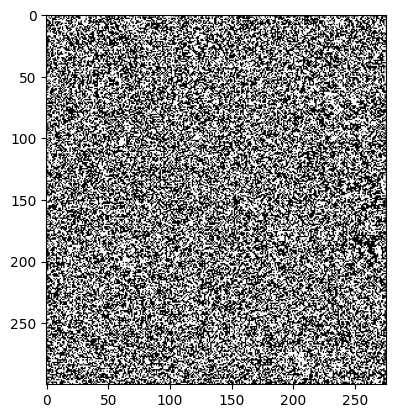

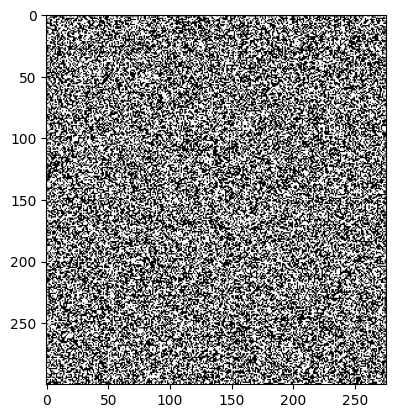

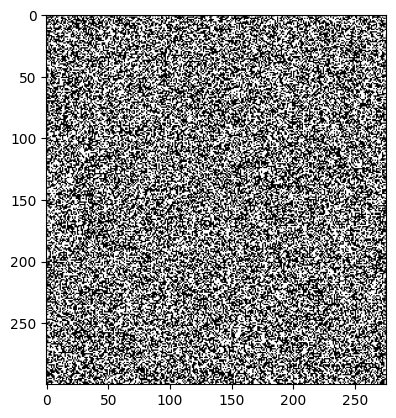

(array([[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]]),
 array([[1, 0, 1, ..., 0, 0, 1],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 1, 1, 1],
        [1, 0, 0, ..., 1, 1, 1]]),
 array([[0, 1, 1, ..., 1, 1, 0],
        [0, 1, 0, ..., 1, 1, 1],
        [0, 1, 0, ..., 1, 1, 1],
        ...,
        [0, 1, 0, ..., 1, 1, 1],
   

In [78]:
Random(img, 2)
#bitplane(im)

### a. extract the RGB channels and convert them
### b. randomply chose 3 channels from(r,g,b,y,cb,cr) and merge them

In [6]:
def RGB2YBbCr(I):
    B, G, R = cv.split(I)


    imgYCC = cv.cvtColor(I, cv.COLOR_BGR2YCR_CB)
    Y = imgYCC[:,:,0]
    Cb = imgYCC[:,:,2]
    Cr = imgYCC[:,:,1]


    channels = ['B','G','R','Y','Cb','Cr']
    temp = []
    for i in range(3):
        C = random.choice(channels)
        if C == 'B':
            C = B
        elif C == 'G':
            C = G
        elif C == 'R':
            C = R
        elif C == 'Y':
            C = Y
        elif C == 'Cb':
            C = Cb
        elif C == 'Cr':
            C = Cr
        temp.append(C)

    newim = cv.merge((temp[0], temp[1], temp[2]))
    plt.imshow(newim[:,:,::-1])


    return newim


array([[[125, 107, 174],
        [125, 107, 174],
        [133, 112, 171],
        ...,
        [122, 101, 171],
        [110, 103, 175],
        [ 90, 107, 179]],

       [[125, 107, 174],
        [125, 107, 174],
        [133, 112, 171],
        ...,
        [122, 101, 171],
        [110, 103, 175],
        [ 90, 107, 179]],

       [[125, 107, 174],
        [125, 107, 174],
        [133, 112, 171],
        ...,
        [122, 101, 171],
        [110, 103, 175],
        [ 90, 107, 179]],

       ...,

       [[ 60, 138, 157],
        [ 60, 138, 157],
        [ 58, 133, 158],
        ...,
        [ 84, 117, 177],
        [ 76, 114, 179],
        [ 79, 117, 184]],

       [[ 57, 135, 155],
        [ 57, 135, 155],
        [ 62, 132, 157],
        ...,
        [ 79, 114, 181],
        [ 81, 114, 182],
        [ 81, 113, 183]],

       [[ 57, 135, 155],
        [ 57, 135, 155],
        [ 62, 132, 157],
        ...,
        [ 79, 114, 181],
        [ 81, 114, 182],
        [ 81, 113, 183]]

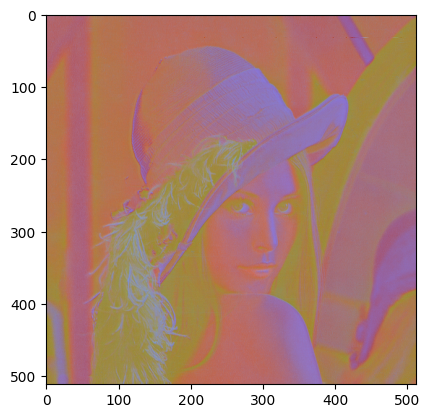

In [22]:
RGB2YBbCr(img)

### divide the image in 5x5 non overlapping blocks for each block, swap the pixels in the main diagonal with those of the secondary diagonal and compute the negative of the remaining pixels

In [19]:
def Swap_blocks(I):
    img = cv.cvtColor(I, cv.COLOR_BGR2GRAY)
    new_img = np.zeros((img.shape[1], img.shape[0]))
    new_img = img
    h,w = new_img.shape
    while True:
        if w%5 != 0:
            w-=1
        else:
            break
    while True:
        if h%5 != 0:
            h-=1
        else:
            break


    new_img = 255 - img


    for i in range(0,w-1, 5):
        for j in range(0, h-1, 5):
            new_img[i,j] = img[i,j+4]
            new_img[i+1,j+1] = img[i+1, j+3]
            new_img[i+2,j+2] = img[i+2, j+2]   
            new_img[i+3,j+3] = img[i+3, j+1] 
            new_img[i+4,j+4] = img[i+4, j]

    plt.imshow(new_img, cmap='gray')

    return new_img

array([[162,  93,  93, ...,  85, 100, 127],
       [ 93, 161,  93, ...,  85, 100, 127],
       [ 93,  93, 162, ...,  85, 100, 127],
       ...,
       [212, 212, 205, ...,  81, 155, 157],
       [211, 211, 200, ..., 151, 150, 147],
       [211, 211, 200, ..., 151, 150, 147]], dtype=uint8)

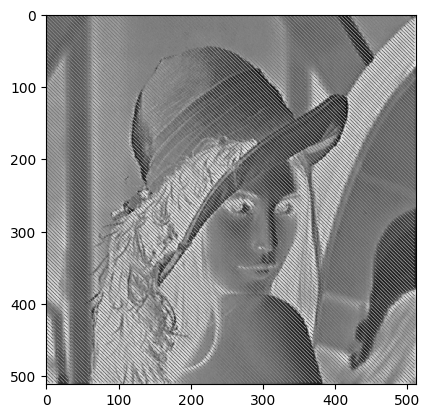

In [20]:
Swap_blocks(img)
